## 494272
## Hariharan

## Task 1 

## a) Import pandas under the alias pd, numpy under the alisa np and matplotlib like in the tutorials.
From tutorial imported pandas, numpy and matplotlib as pd,np and plt
The first step involves importing essential Python libraries for data analysis and visualization. `pandas` is used for data manipulation and analysis, `numpy` for numerical operations, and `matplotlib.pyplot` for plotting. These libraries are standard in data science workflows and provide the necessary tools for handling time series data and visualizing results.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## b) 
index_col=0 is used to confirm timestamps is the index of the data frame

parse_dates=True converts the timestamps into pd.DatetimeIndex 

head()- to load the top few data

When loading the wind speed data from a CSV file, the `index_col=0` parameter ensures that the first column (timestamps) is used as the DataFrame index, which is crucial for time series analysis. The `parse_dates=True` argument automatically parses the timestamps into `pd.DatetimeIndex`, enabling time-based operations. Using `.head()` displays the first few rows, allowing for a quick inspection of the data structure and content.

In [3]:
wind_speeds = pd.read_csv('wind-speeds.csv', index_col=0, parse_dates=True)
wind_speeds.head()

,wind_speed_m_s
time,
2019-01-01 00:00:00,11.484892
2019-01-01 01:00:00,11.835971
2019-01-01 02:00:00,12.323022
2019-01-01 03:00:00,13.186331
2019-01-01 04:00:00,14.068345


## c)
type to check what is the type of function 
To confirm the type of the DataFrame index, the `type()` function is used. This helps verify that the index is indeed a `DatetimeIndex`, which is necessary for time-based slicing and resampling. Additionally, accessing `wind_speeds.index.year` and `wind_speeds.index.month` demonstrates how to extract temporal features from the index, which can be useful for further analysis.

In [4]:
type(wind_speeds.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [5]:
print(wind_speeds.index.year[:5])
print(wind_speeds.index.month[:5])

Index([2019, 2019, 2019, 2019, 2019], dtype='int32', name='time')
Index([1, 1, 1, 1, 1], dtype='int32', name='time')


## d)
Conversion Factor: The factor (ln (z2/z0)/ln(z1/z0)) is computed to numpy.
Conversion: The wind speeds from the dataset are multiplied by the conversion factor to adjust them to the hub height of 90 meters.

Wind speeds are often measured at a reference height (e.g., 10 meters), but wind turbines operate at higher hub heights (e.g., 90 meters). To adjust wind speeds to the hub height, a logarithmic wind profile is used, with the conversion factor calculated as `ln(z2/z0)/ln(z1/z0)`, where `z1` is the reference height, `z2` is the hub height, and `z0` is the surface roughness length. Multiplying the original wind speeds by this factor provides an estimate of wind speeds at the turbine's hub height.


In [6]:
# Given
z1 = 10  # Reference height in meters
z2 = 90  # Hub height in meters
z0 = 0.03  # Roughness length for open flat grassland in meters

# Calculate the conversion factor
conversion_factor = np.log(z2 / z0) / np.log(z1 / z0)
print(f"Conversion Factor: {conversion_factor:.4f}")

Conversion Factor: 1.3782


In [7]:
# Apply the conversion factor to wind speeds
wind_speeds['Converted Wind Speeds'] = wind_speeds.iloc[:, 0] * conversion_factor

# Display the converted wind speeds for the first 10 hours of the year
print("First 10 hours of converted wind speeds (m/s):")
wind_speeds['Converted Wind Speeds'].head(10)

First 10 hours of converted wind speeds (m/s):


time
2019-01-01 00:00:00    15.828887
2019-01-01 01:00:00    16.312757
2019-01-01 02:00:00    16.984027
2019-01-01 03:00:00    18.173870
2019-01-01 04:00:00    19.389494
2019-01-01 05:00:00    19.311163
2019-01-01 06:00:00    18.862988
2019-01-01 07:00:00    19.221924
2019-01-01 08:00:00    19.665141
2019-01-01 09:00:00    20.118273
Name: Converted Wind Speeds, dtype: float64

## e)
Cut-in Speed: Below 3 m/s, both turbines produce no power.

Nominal Power: Between 12–22 m/s for Vestas and 15–25 m/s for Enercon, the turbines produce their rated maximum power (3.5 MW).

Cut-out Speed: At wind speeds beyond 22 m/s for Vestas and 25 m/s for Enercon, the turbines shut down for safety reasons, producing no power.

Intermediate Speeds: For simplicity, linear scaling is used as an example for the ranges between cut-in and nominal speeds. You can modify the scaling based on the exact power curve values (once available).


In [8]:
def power_production_vestas(wind_speed):
    """
    Calculate power production for the Vestas turbine model.
    """
    if wind_speed < 3:
        return 0  
    elif 3 <= wind_speed < 12:
        return (wind_speed - 3) * 0.4  
    elif 12 <= wind_speed <= 22:
        return 3.5  
    else:
        return 0  

def power_production_enercon(wind_speed):
    """
    Calculate power production for the Enercon turbine model.
    """
    if wind_speed < 3:
        return 0  
    elif 3 <= wind_speed < 15:
        return (wind_speed - 3) * 0.3  
    elif 15 <= wind_speed <= 25:
        return 3.5  
    else:
        return 0  


## f)
The .apply() method is used to apply the power_production_vestas and power_production_enercon functions to the column of converted wind speeds, generating power outputs for the entire year.

Two new columns are added to the wind_speeds DataFrame: one for Vestas power production and another for Enercon power production.

.tail(20)to show last 20 rows of each column to show the electricity generation for the final 20 hours of the year.

In [9]:
wind_speeds['Vestas Power Production (MW)'] = wind_speeds['Converted Wind Speeds'].apply(power_production_vestas)
wind_speeds['Enercon Power Production (MW)'] = wind_speeds['Converted Wind Speeds'].apply(power_production_enercon)

# Display the last 20 hours of electricity generation
print("Last 20 hours of electricity generation for the Vestas turbine (MW):")
wind_speeds['Vestas Power Production (MW)'].tail(20)

Last 20 hours of electricity generation for the Vestas turbine (MW):


time
2019-12-31 04:00:00    3.500000
2019-12-31 05:00:00    3.500000
2019-12-31 06:00:00    3.500000
2019-12-31 07:00:00    3.500000
2019-12-31 08:00:00    3.500000
2019-12-31 09:00:00    3.500000
2019-12-31 10:00:00    3.500000
2019-12-31 11:00:00    3.500000
2019-12-31 12:00:00    3.500000
2019-12-31 13:00:00    3.500000
2019-12-31 14:00:00    3.500000
2019-12-31 15:00:00    3.383674
2019-12-31 16:00:00    3.108027
2019-12-31 17:00:00    2.955727
2019-12-31 18:00:00    2.815326
2019-12-31 19:00:00    2.636453
2019-12-31 20:00:00    2.492878
2019-12-31 21:00:00    2.387775
2019-12-31 22:00:00    2.291398
2019-12-31 23:00:00    2.409589
Name: Vestas Power Production (MW), dtype: float64

In [10]:
print("Last 20 hours of electricity generation for the Enercon turbine (MW):")
print(wind_speeds['Enercon Power Production (MW)'].tail(20))

Last 20 hours of electricity generation for the Enercon turbine (MW):
time
2019-12-31 04:00:00    3.500000
2019-12-31 05:00:00    3.500000
2019-12-31 06:00:00    3.500000
2019-12-31 07:00:00    3.500000
2019-12-31 08:00:00    3.500000
2019-12-31 09:00:00    3.500000
2019-12-31 10:00:00    3.417348
2019-12-31 11:00:00    3.360533
2019-12-31 12:00:00    3.193062
2019-12-31 13:00:00    3.015181
2019-12-31 14:00:00    2.780186
2019-12-31 15:00:00    2.537756
2019-12-31 16:00:00    2.331020
2019-12-31 17:00:00    2.216795
2019-12-31 18:00:00    2.111494
2019-12-31 19:00:00    1.977339
2019-12-31 20:00:00    1.869659
2019-12-31 21:00:00    1.790831
2019-12-31 22:00:00    1.718548
2019-12-31 23:00:00    1.807192
Name: Enercon Power Production (MW), dtype: float64


## g)
.sum is used to summing the hourly power production for a whole year.
Compared the output of the 2 turbine
relative margin= (difference in energy output/smaller energy output)*100

In [11]:
# Calculate the yearly energy output (sum of hourly power production for the entire year)
total_energy_vestas = wind_speeds['Vestas Power Production (MW)'].sum()
total_energy_enercon = wind_speeds['Enercon Power Production (MW)'].sum()

if total_energy_vestas > total_energy_enercon:
    better_turbine = "Vestas"
    relative_margin = ((total_energy_vestas - total_energy_enercon) / total_energy_enercon) * 100
else:
    better_turbine = "Enercon"
    relative_margin = ((total_energy_enercon - total_energy_vestas) / total_energy_vestas) * 100

print(f"The {better_turbine} turbine yields the most energy output in the year.")
print(f"The relative margin between the two turbines is {relative_margin:.2f}%.")

The Vestas turbine yields the most energy output in the year.
The relative margin between the two turbines is 25.52%.


## h)
By dividing the hourly power output by 3.5 MW, we get a normalized power output time series where values range from 0 (no power) to 1 (maximum power output).

In [12]:
wind_speeds['Normalized Vestas Power Output'] = wind_speeds['Vestas Power Production (MW)'] / 3.5

print("First 10 normalized power outputs (Vestas):")
print(wind_speeds['Normalized Vestas Power Output'].head(10))

First 10 normalized power outputs (Vestas):
time
2019-01-01 00:00:00    1.0
2019-01-01 01:00:00    1.0
2019-01-01 02:00:00    1.0
2019-01-01 03:00:00    1.0
2019-01-01 04:00:00    1.0
2019-01-01 05:00:00    1.0
2019-01-01 06:00:00    1.0
2019-01-01 07:00:00    1.0
2019-01-01 08:00:00    1.0
2019-01-01 09:00:00    1.0
Name: Normalized Vestas Power Output, dtype: float64


## i)
We sum up the hourly power outputs for the Vestas turbine across the year to get energy output in MW-hours.

Rated Power and Time: The denominator represents the theoretical maximum energy output if the turbine operated at full capacity (3.5 MW) every hour of the year.

Capacity factor =Total energy output per year /(rated power x number of hours in a year


In [13]:
total_energy_vestas_mwh = wind_speeds['Vestas Power Production (MW)'].sum()

rated_power = 3.5  # MW
hours_per_year = 8760  

capacity_factor_vestas = (total_energy_vestas_mwh / (rated_power * hours_per_year)) * 100

print(f"Annual Average Capacity Factor for the Vestas turbine: {capacity_factor_vestas:.2f}%")

Annual Average Capacity Factor for the Vestas turbine: 66.82%


## j)

.resample('ME') method groups data by months, creating monthly bins.

Mean calc. For each monthly bin, the .mean() function computes the average of the normalized power output, resulting in the monthly average capacity factor.

In [14]:
monthly_avg_capacity_vestas = wind_speeds['Normalized Vestas Power Output'].resample('ME').mean()

print("Monthly Average Capacity Factors (Vestas):")
monthly_avg_capacity_vestas

Monthly Average Capacity Factors (Vestas):


time
2019-01-31    0.718786
2019-02-28    0.777954
2019-03-31    0.778827
2019-04-30    0.629865
2019-05-31    0.674854
2019-06-30    0.604296
2019-07-31    0.595217
2019-08-31    0.470268
2019-09-30    0.714418
2019-10-31    0.641973
2019-11-30    0.664699
2019-12-31    0.756384
Freq: ME, Name: Normalized Vestas Power Output, dtype: float64

## k)
The share of time with no power production is determined by counting the number of hours where the turbine's output is zero and dividing by the total number of hours in the year. This metric highlights periods of insufficient wind and provides insight into the reliability of wind energy at the site.

In [15]:

total_hours = len(wind_speeds)

no_power_hours_vestas = (wind_speeds['Vestas Power Production (MW)'] == 0).sum()

# Share of time with no power production
no_power_share_vestas = (no_power_hours_vestas / total_hours) * 100
no_power_share_vestas

0.7534246575342466

## l)
Similarly, the share of time the turbine operates at rated capacity is calculated by counting the hours with maximum output and expressing this as a percentage of the total hours. This indicates how often the turbine is fully utilized, which is important for economic and operational assessments.

In [16]:
rated_capacity_hours_vestas = (wind_speeds['Vestas Power Production (MW)'] == 3.5).sum()

rated_capacity_share_vestas = (rated_capacity_hours_vestas / total_hours) * 100

print(f"Share of time the Vestas turbine produces power at rated capacity: {rated_capacity_share_vestas:.2f}%")

Share of time the Vestas turbine produces power at rated capacity: 18.90%


## m)
To assess whether the turbine ever shuts down due to high wind speeds, the number of hours with wind speeds exceeding the cut-out threshold is counted. If this number is greater than zero, it confirms that shutdowns occurred, which can impact annual energy production and turbine wear.


In [17]:
shut_down_hours = (wind_speeds['Converted Wind Speeds'] > 22).sum()

if shut_down_hours > 0:
    print(f"Yes, the Vestas turbine shuts down due to high wind speeds for {shut_down_hours} hours in the year.")
else:
    print("No, the Vestas turbine does not shut down due to high wind speeds.")


No, the Vestas turbine does not shut down due to high wind speeds.


## n)
Plotting the normalized power output (capacity factor) as a time series provides a visual overview of the turbine's performance throughout the year. Peaks and troughs in the plot correspond to periods of high and low wind availability, respectively, and can reveal patterns such as seasonal variability or extreme events.

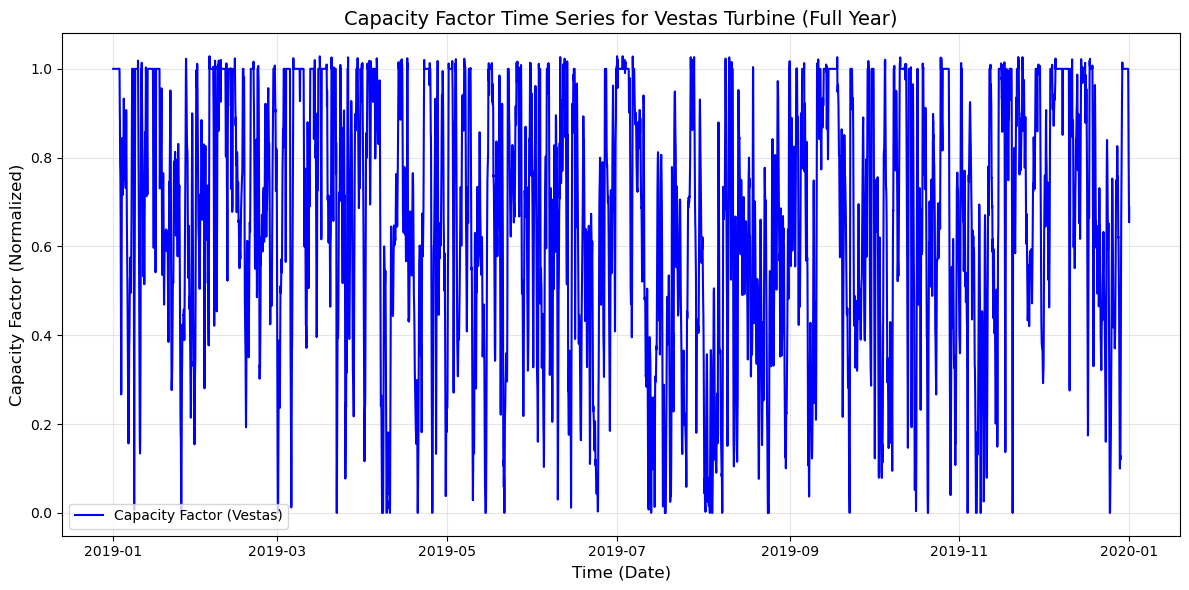

In [18]:
# Plot 
plt.figure(figsize=(12, 6))  

# Plot the time series
plt.plot(wind_speeds.index, wind_speeds['Normalized Vestas Power Output'], label='Capacity Factor (Vestas)', color='blue')
plt.xlabel('Time (Date)', fontsize=12) 
plt.ylabel('Capacity Factor (Normalized)', fontsize=12)  # Y-axis label
plt.title('Capacity Factor Time Series for Vestas Turbine (Full Year)', fontsize=14)  
plt.grid(alpha=0.3)  
plt.legend(fontsize=10) 
plt.tight_layout()  
plt.show()


## Task 2

## a)
The dataset is loaded from a CSV file containing hourly time series data for Germany in 2015, including electricity demand, onshore and offshore wind capacity factors, solar PV capacity factor, and electricity prices. Column names are assigned for clarity. Descriptive statistics (mean, minimum, maximum, standard deviation) are calculated for each column to summarize the data. The column with the highest standard deviation is identified, indicating the variable with the greatest variability over the year.


In [19]:

url = "https://tubcloud.tu-berlin.de/s/nwCrNLrtL6LAN3W/download/time-series-lecture-2.csv"
df = pd.read_csv(url, parse_dates=[0], index_col=0)

df.columns = [
    "Electricity Demand (GW)",
    "Onshore Wind Capacity Factor",
    "Offshore Wind Capacity Factor",
    "Solar PV Capacity Factor",
    "Electricity Price (€/MWh)"
]

means = df.mean()
mins = df.min()
maxs = df.max()
std_devs = df.std()

highest_std_dev_column = std_devs.idxmax()

print("Means of each column:")
print(means)
print("\nMinimums of each column:")
print(mins)
print("\nMaximums of each column:")
print(maxs)
print("\nStandard Deviations of each column:")
print(std_devs)
print(f"\nColumn with the highest standard deviation: {highest_std_dev_column}")


Means of each column:
Electricity Demand (GW)          54.736992
Onshore Wind Capacity Factor      0.205556
Offshore Wind Capacity Factor     0.362993
Solar PV Capacity Factor          0.122621
Electricity Price (€/MWh)        31.835717
dtype: float64

Minimums of each column:
Electricity Demand (GW)          32.4180
Onshore Wind Capacity Factor      0.0007
Offshore Wind Capacity Factor     0.0000
Solar PV Capacity Factor          0.0000
Electricity Price (€/MWh)       -79.9400
dtype: float64

Maximums of each column:
Electricity Demand (GW)          75.8170
Onshore Wind Capacity Factor      0.9659
Offshore Wind Capacity Factor     0.9856
Solar PV Capacity Factor          0.8134
Electricity Price (€/MWh)        99.7700
dtype: float64

Standard Deviations of each column:
Electricity Demand (GW)           9.890092
Onshore Wind Capacity Factor      0.189632
Offshore Wind Capacity Factor     0.292684
Solar PV Capacity Factor          0.182637
Electricity Price (€/MWh)        12.482199
dtyp

## b)
Rows with missing data (NaN values) are identified by checking for any null values across columns. The timestamps of these rows are listed, allowing for targeted data cleaning or imputation. This step is crucial for ensuring data quality before further analysis.

In [20]:
missing_data = df[df.isnull().any(axis=1)]

missing_timestamps = missing_data.index

print("Timestamps with missing data:")
missing_timestamps


Timestamps with missing data:


DatetimeIndex(['2015-01-01 00:00:00', '2015-01-01 01:00:00',
               '2015-01-01 02:00:00', '2015-01-01 03:00:00',
               '2015-01-01 04:00:00', '2015-01-01 05:00:00',
               '2015-01-01 06:00:00', '2015-01-01 07:00:00',
               '2015-01-01 08:00:00', '2015-01-01 09:00:00',
               '2015-01-01 10:00:00', '2015-01-01 11:00:00',
               '2015-01-01 12:00:00', '2015-01-01 13:00:00',
               '2015-01-01 14:00:00', '2015-01-01 15:00:00',
               '2015-01-01 16:00:00', '2015-01-01 17:00:00',
               '2015-01-01 18:00:00', '2015-01-01 19:00:00',
               '2015-01-01 20:00:00', '2015-01-01 21:00:00',
               '2015-01-01 22:00:00', '2015-01-01 23:00:00',
               '2015-01-02 00:00:00', '2015-01-02 01:00:00',
               '2015-01-02 02:00:00', '2015-01-02 03:00:00',
               '2015-01-02 04:00:00', '2015-01-02 05:00:00',
               '2015-01-02 06:00:00', '2015-01-02 07:00:00',
               '2015-01-

## c)
Missing values are filled using data from 6 days (144 hours) ahead, leveraging the `.shift(-144)` method. This approach assumes that similar conditions may occur weekly, making it a reasonable imputation strategy for time series data. After filling, the dataset is checked for any remaining missing values to confirm the effectiveness of the procedure.


In [21]:
df_filled = df.copy()  
missing_indices = df[df.isnull().any(axis=1)].index  
for col in df.columns:
    if df[col].isnull().any():
        df_filled[col] = df[col].fillna(df[col].shift(-144))  


remaining_missing = df_filled.isnull().sum().sum()

if remaining_missing == 0:
    print("All missing values have been successfully filled using values 6 days ahead.")
else:
    print(f"There are still {remaining_missing} missing values in the DataFrame.")

All missing values have been successfully filled using values 6 days ahead.


## d)
Time series plots are created for each variable to visualize their evolution over the year. These plots reveal patterns such as daily and seasonal cycles, variability in renewable generation, and fluctuations in electricity prices. Visual inspection helps identify trends, anomalies, and relationships between variables.

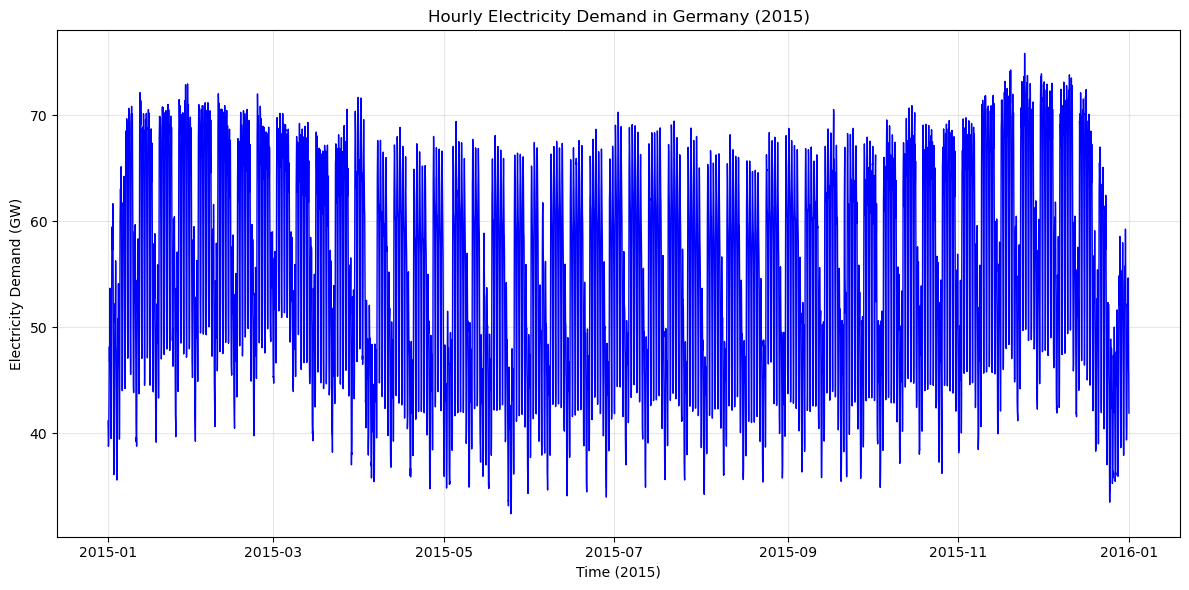

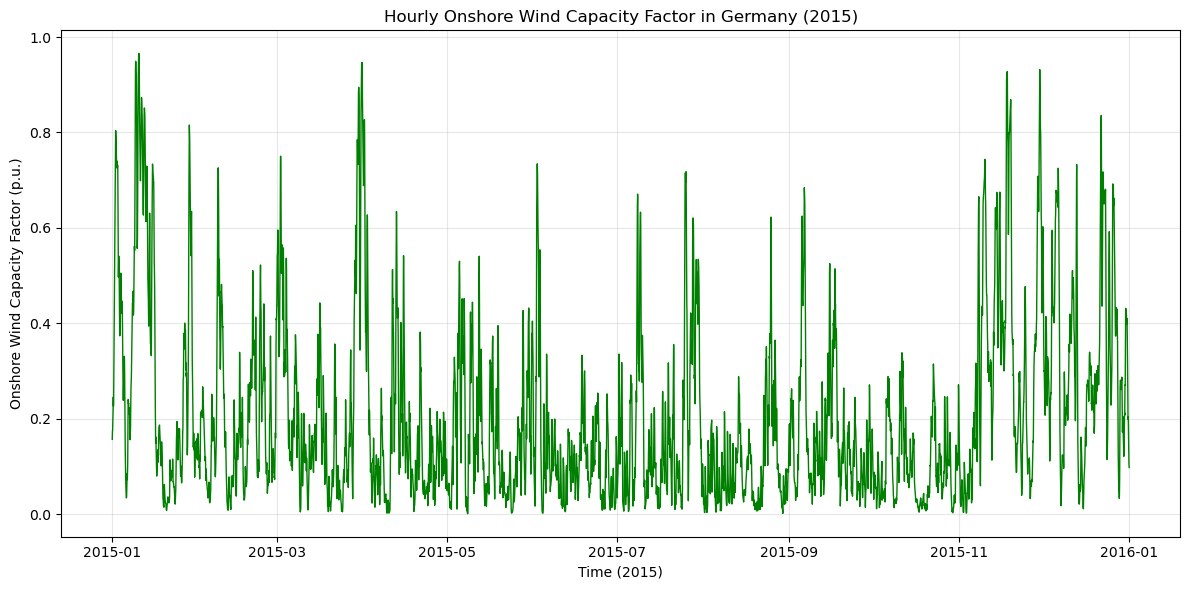

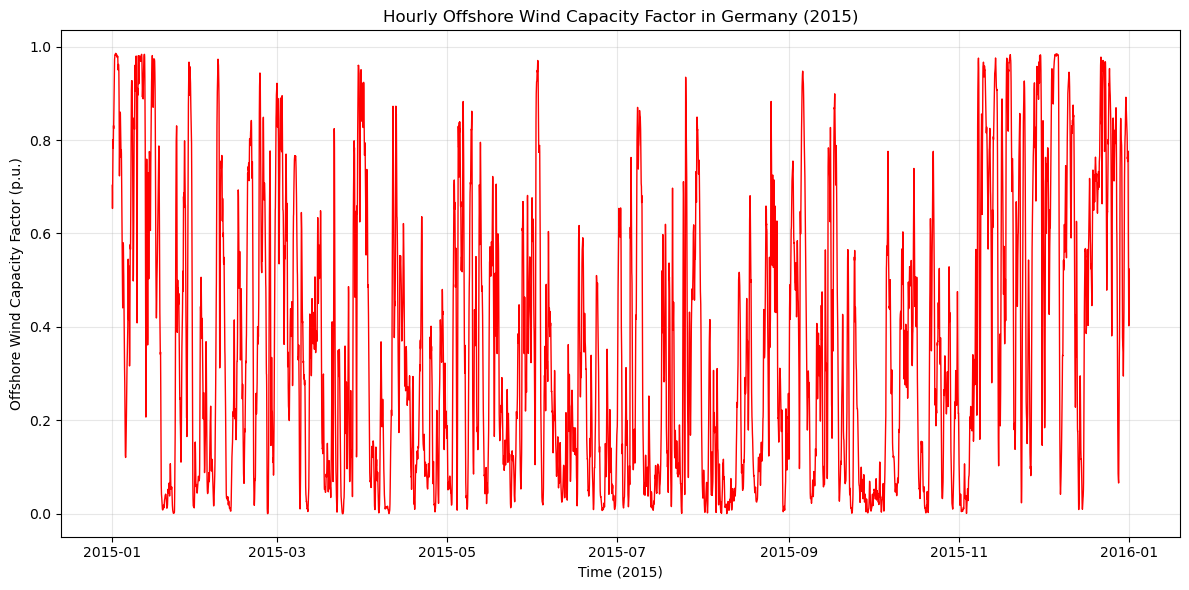

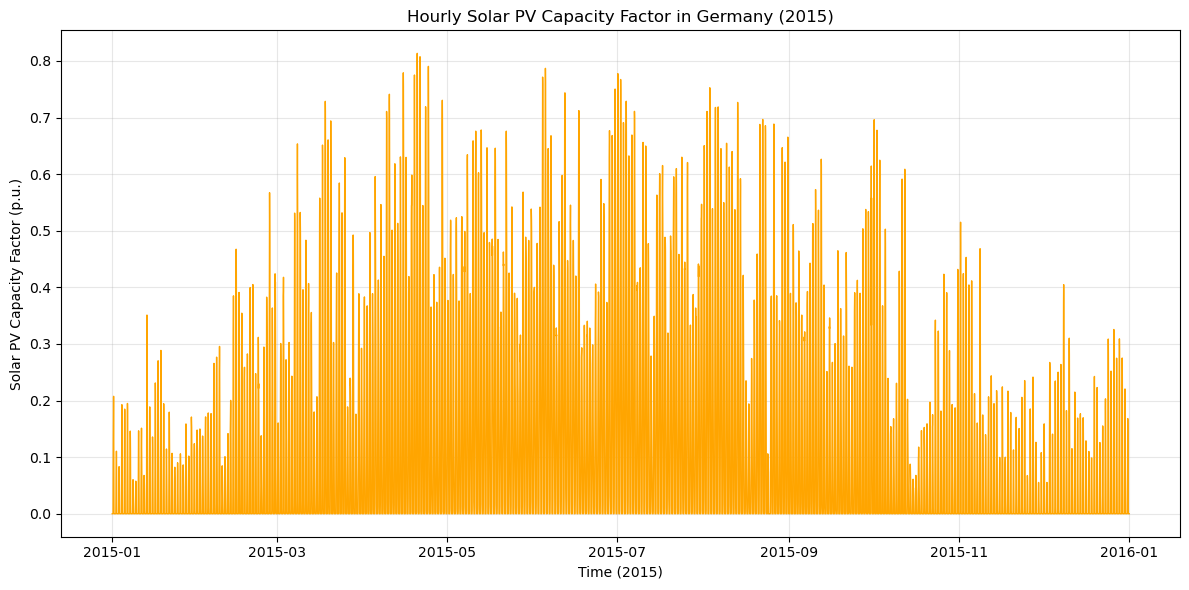

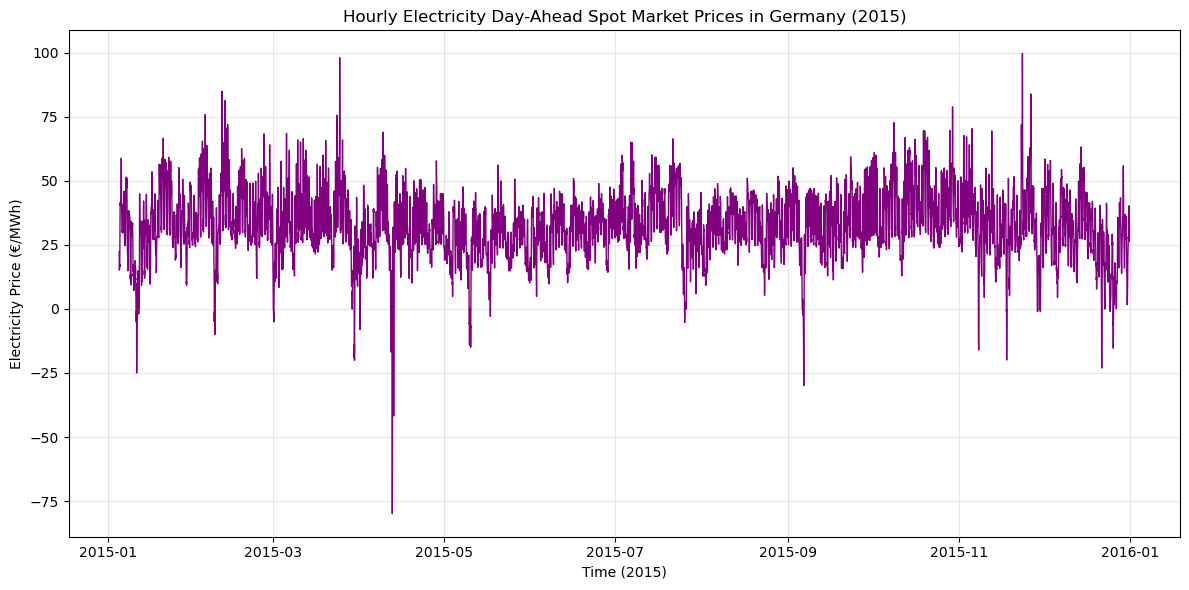

In [22]:
# Plot 1: Electricity Demand Time Series
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Electricity Demand (GW)"], color='blue', linewidth=1)
plt.xlabel("Time (2015)")
plt.ylabel("Electricity Demand (GW)")
plt.title("Hourly Electricity Demand in Germany (2015)")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Plot 2: Onshore Wind Capacity Factor Time Series
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Onshore Wind Capacity Factor"], color='green', linewidth=1)
plt.xlabel("Time (2015)")
plt.ylabel("Onshore Wind Capacity Factor (p.u.)")
plt.title("Hourly Onshore Wind Capacity Factor in Germany (2015)")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Plot 3: Offshore Wind Capacity Factor Time Series
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Offshore Wind Capacity Factor"], color='red', linewidth=1)
plt.xlabel("Time (2015)")
plt.ylabel("Offshore Wind Capacity Factor (p.u.)")
plt.title("Hourly Offshore Wind Capacity Factor in Germany (2015)")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Plot 4: Solar PV Capacity Factor Time Series
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Solar PV Capacity Factor"], color='orange', linewidth=1)
plt.xlabel("Time (2015)")
plt.ylabel("Solar PV Capacity Factor (p.u.)")
plt.title("Hourly Solar PV Capacity Factor in Germany (2015)")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Plot 5: Electricity Day-Ahead Spot Market Prices Time Series
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Electricity Price (€/MWh)"], color='purple', linewidth=1)
plt.xlabel("Time (2015)")
plt.ylabel("Electricity Price (€/MWh)")
plt.title("Hourly Electricity Day-Ahead Spot Market Prices in Germany (2015)")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


## e)
The analysis is repeated for August 2015, focusing on a single month to examine finer temporal details. Plotting each variable for this period allows for the identification of short-term patterns, such as daily cycles, weather events, or market fluctuations, which may be less apparent in annual plots.


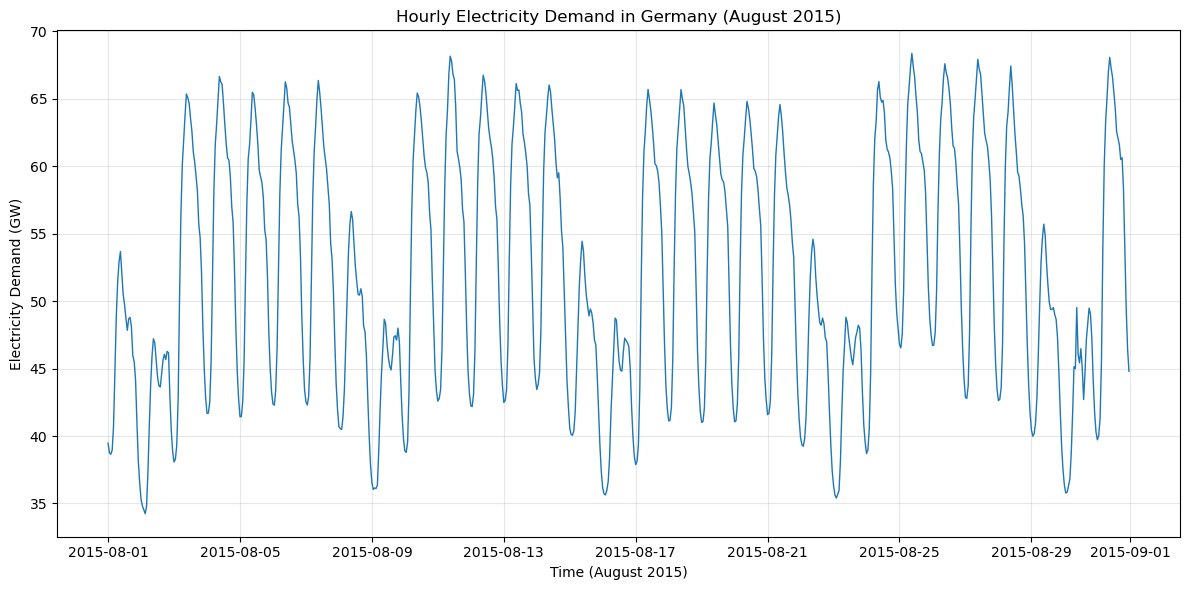

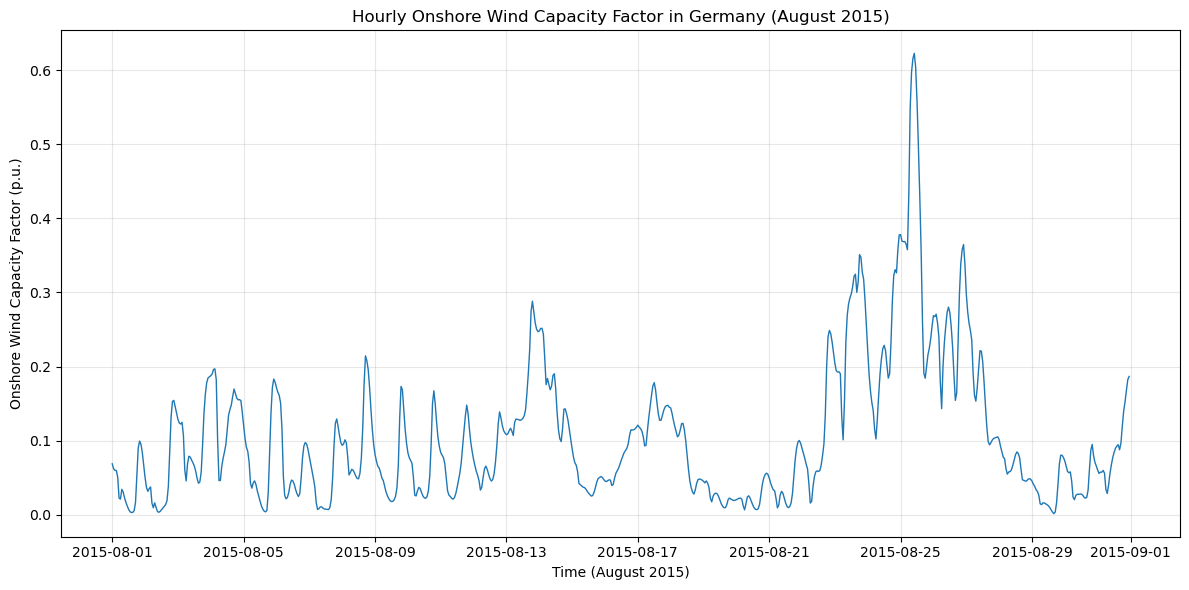

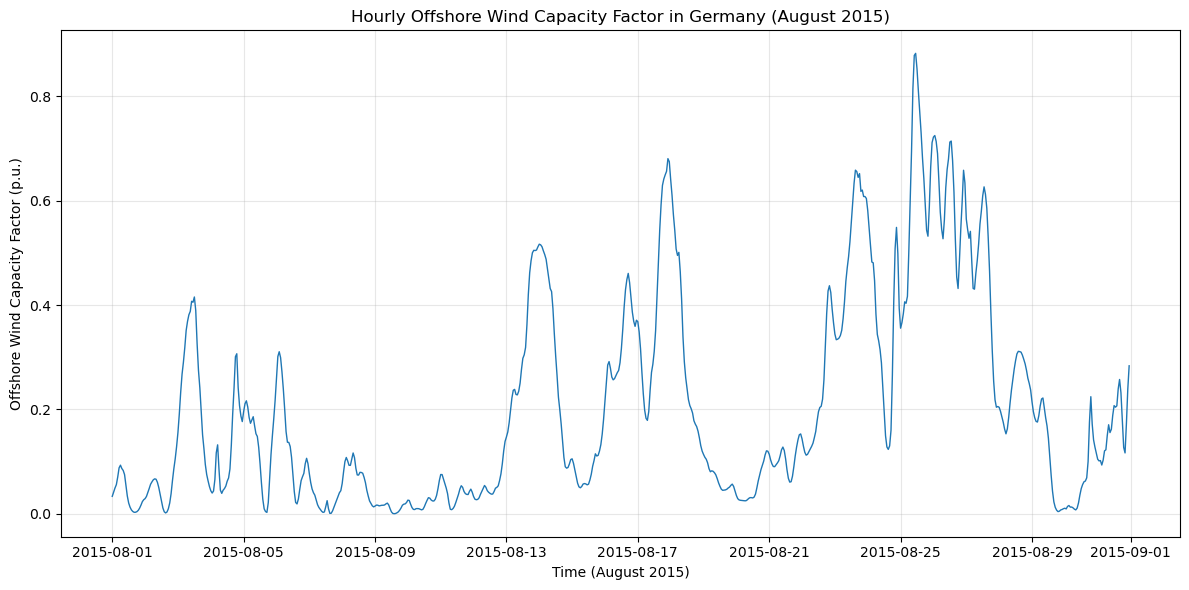

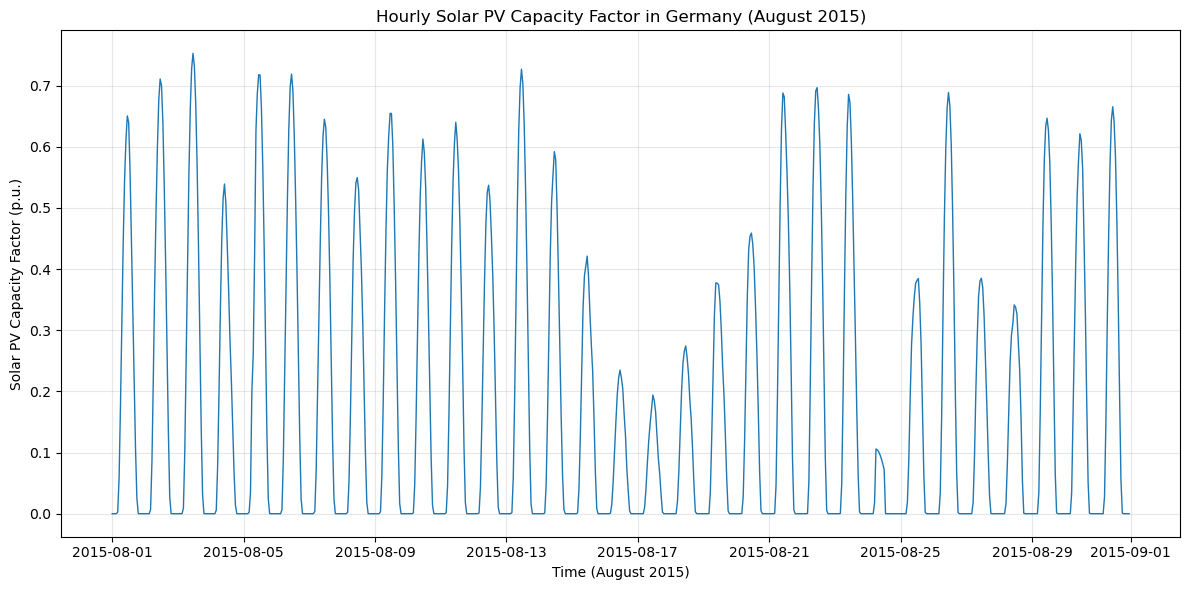

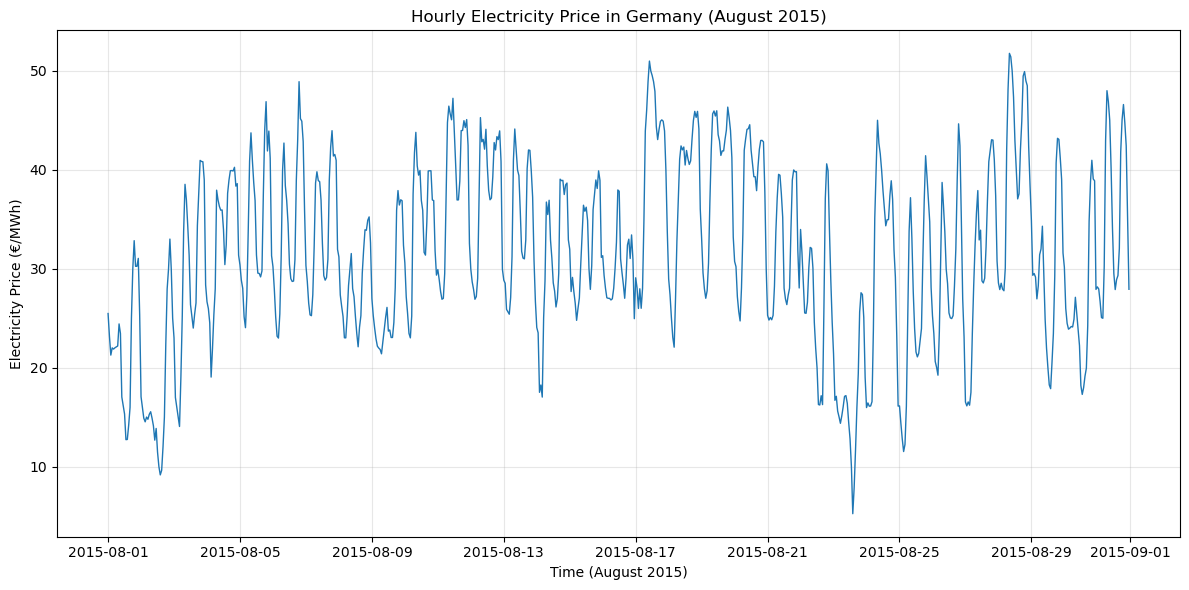

In [23]:
august_data = df[(df.index >= "2015-08-01") & (df.index < "2015-09-01")]

columns = df.columns
titles = [
    "Hourly Electricity Demand",
    "Hourly Onshore Wind Capacity Factor",
    "Hourly Offshore Wind Capacity Factor",
    "Hourly Solar PV Capacity Factor",
    "Hourly Electricity Price"
]
y_labels = [
    "Electricity Demand (GW)",
    "Onshore Wind Capacity Factor (p.u.)",
    "Offshore Wind Capacity Factor (p.u.)",
    "Solar PV Capacity Factor (p.u.)",
    "Electricity Price (€/MWh)"
]

# Loop through columns and plot each time series
for i, col in enumerate(columns):
    plt.figure(figsize=(12, 6))
    plt.plot(august_data.index, august_data[col], linewidth=1)
    plt.xlabel("Time (August 2015)")
    plt.ylabel(y_labels[i])
    plt.title(f"{titles[i]} in Germany (August 2015)")
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

## f)
The time series are resampled to daily, weekly, and monthly frequencies using `.resample()` and `.mean()`. This aggregation smooths out short-term fluctuations and highlights longer-term trends. Plotting the resampled series for electricity demand demonstrates how data granularity affects the visibility of patterns and variability.

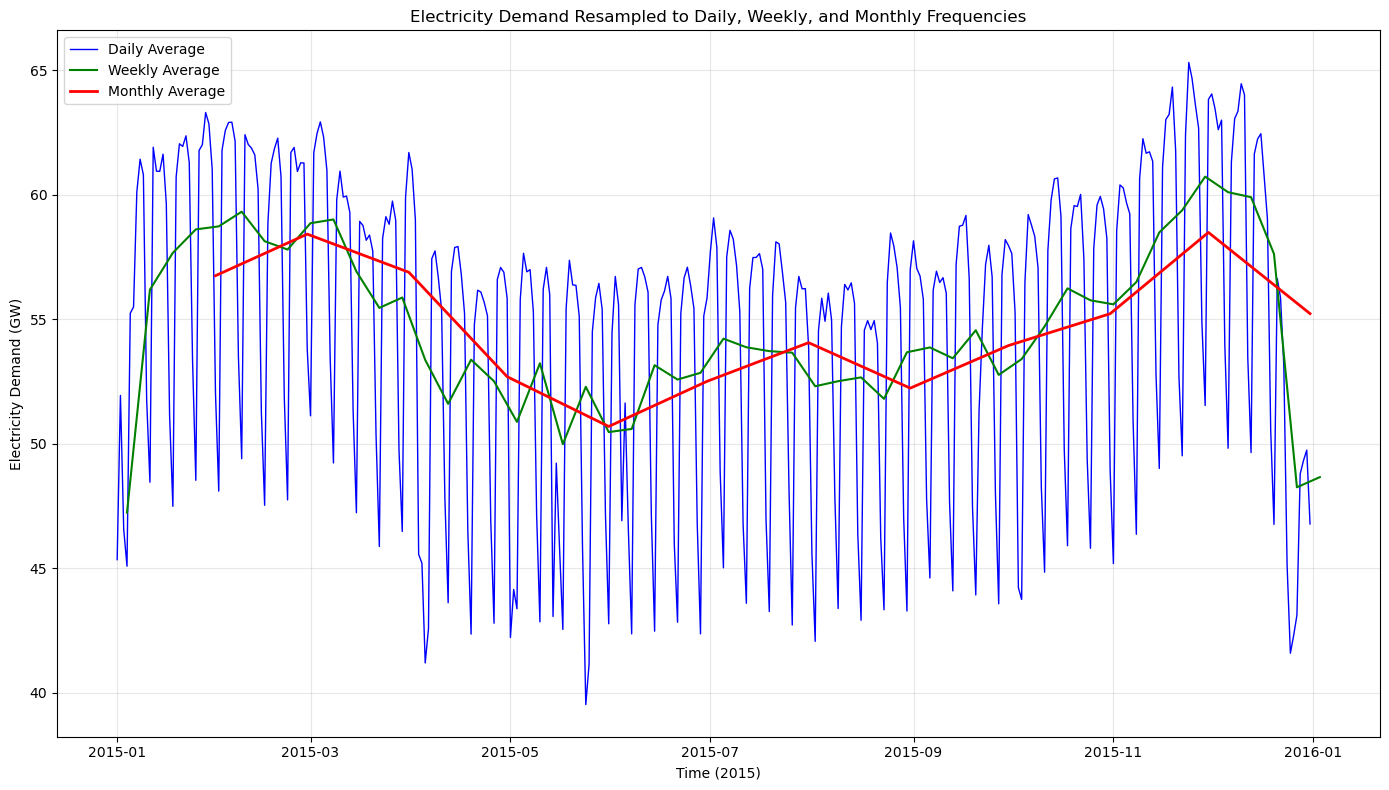

In [24]:
daily_data = df.resample('D').mean()
weekly_data = df.resample('W').mean()
monthly_data = df.resample('ME').mean()

plt.figure(figsize=(14, 8))
plt.plot(daily_data.index, daily_data["Electricity Demand (GW)"], label="Daily Average", color='blue', linewidth=1)
plt.plot(weekly_data.index, weekly_data["Electricity Demand (GW)"], label="Weekly Average", color='green', linewidth=1.5)
plt.plot(monthly_data.index, monthly_data["Electricity Demand (GW)"], label="Monthly Average", color='red', linewidth=2)

plt.xlabel("Time (2015)")
plt.ylabel("Electricity Demand (GW)")
plt.title("Electricity Demand Resampled to Daily, Weekly, and Monthly Frequencies")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


## g)
A duration curve is constructed by sorting the electricity demand values in descending order and plotting them against the percentage of the year. This curve illustrates the distribution of demand levels, showing how often high or low demand occurs. It is a useful tool for capacity planning and reliability analysis.


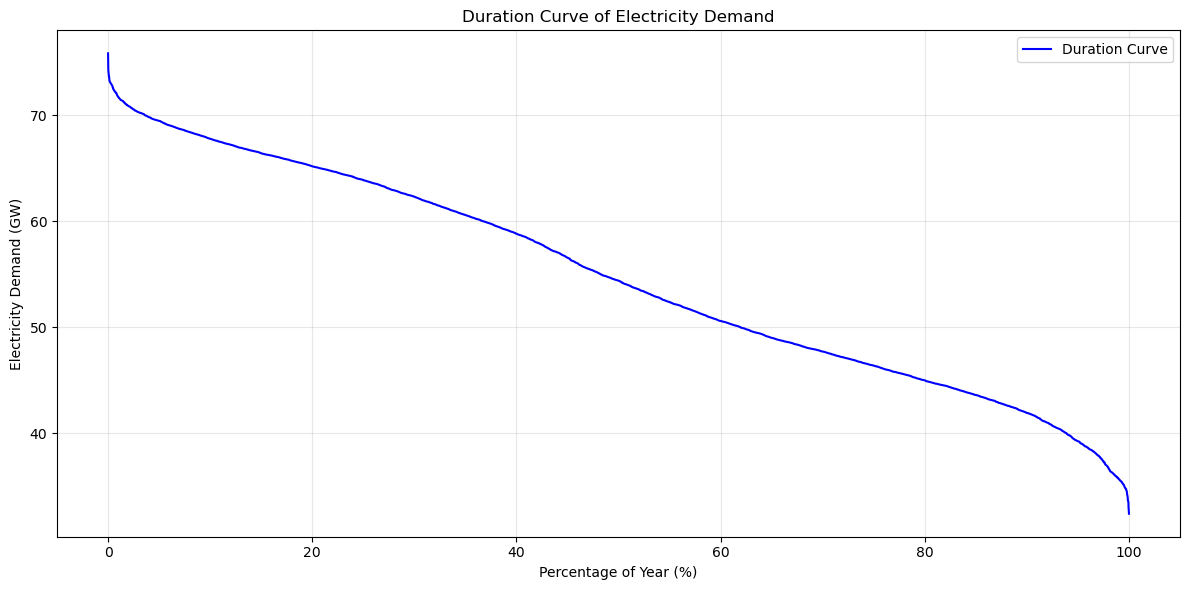

In [25]:
sorted_values = df["Electricity Demand (GW)"].sort_values(ascending=False).reset_index(drop=True)
x_percentage = (sorted_values.index / len(sorted_values)) * 100

plt.figure(figsize=(12, 6))
plt.plot(x_percentage, sorted_values, color='blue', label="Duration Curve")
plt.xlabel("Percentage of Year (%)")
plt.ylabel("Electricity Demand (GW)")
plt.title("Duration Curve of Electricity Demand")
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


## h)
A Fourier Transform is applied to the electricity demand time series to analyze its frequency components. The resulting spectrum reveals dominant periodicities, such as daily and weekly cycles, which correspond to human activity patterns and operational schedules. Peaks at specific frequencies indicate regular, repeating patterns in the data, while harmonics capture more complex variability.

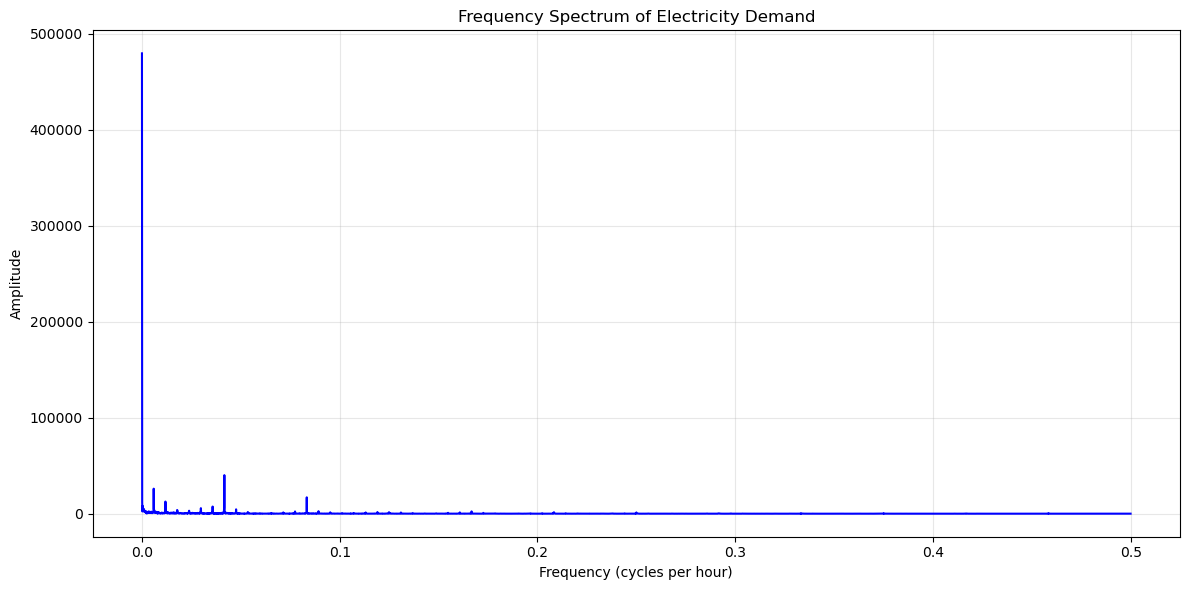

In [26]:
import numpy as np

load_time_series = df["Electricity Demand (GW)"]  
n = len(load_time_series)  
fft_result = np.fft.fft(load_time_series)  
fft_freqs = np.fft.fftfreq(n, d=1)  

positive_freqs = fft_freqs[:n // 2]
positive_spectrum = np.abs(fft_result[:n // 2])

plt.figure(figsize=(12, 6))
plt.plot(positive_freqs, positive_spectrum, color='blue')
plt.xlabel("Frequency (cycles per hour)")
plt.ylabel("Amplitude")
plt.title("Frequency Spectrum of Electricity Demand")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


Daily Peak:
A peak at a frequency of 1 cycle per day (0.0417 cycles per hour) reflects the daily load cycle, driven by human activity patterns (work hours, energy demand at night, etc.).

Weekly Peak:
A smaller peak at a frequency of 1 cycle per week (0.006 cycles per hour) corresponds to weekly patterns in electricity demand, such as lower demand on weekends.

Harmonics:
Higher-frequency peaks are likely harmonics of the daily or weekly cycles. These harmonics capture additional details of the load variability.

## Task 3 Solar Power in the World

## a)
The solar power dataset is loaded from an Excel file and converted into a GeoDataFrame using `geopandas`. The `points_from_xy` function creates geometric points from longitude and latitude, enabling geospatial analysis. Setting the coordinate reference system (CRS) to `EPSG:4326` ensures compatibility with global mapping standards.

In [27]:
import geopandas as gpd

file_path = "Global-Solar-Power-Tracker-May-2023.xlsx"  
xls = pd.ExcelFile(file_path)
df = pd.read_excel(xls, sheet_name="Data")  
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df["Longitude"], df["Latitude"]))
gdf.set_crs("EPSG:4326", inplace=True)  
gdf.head()

,Date Last Researched,Country,Project Name,Phase Name,Project Name in Local Language / Script,Other Name(s),Capacity (MW),Capacity Rating,Technology Type,Status,...,"Major area (prefecture, district)",State/Province,Subregion,Region,GEM location ID,GEM phase ID,Other IDs (location),Other IDs (unit/phase),Wiki URL,geometry
0,2022-08-16,Algeria,Adrar Solar Plant,NaN,NaN,NaN,20.0,MWp/dc,PV,operating,...,NaN,Adrar,Northern Africa,Africa,L800008,G800008,WRI: WKS0068905,NaN,https://gem.wiki/Adrar_Solar_Plant,POINT (-0.3174 27.9077)
1,2022-08-16,Algeria,Ain Azel solar farm,NaN,محطة توليد الكهرباء بعين زادة,NaN,20.0,unknown,PV,operating,...,NaN,Sétif,Northern Africa,Africa,L800010,G800010,WRI: WKS0065285,NaN,https://gem.wiki/Ain_Azel_solar_farm,POINT (5.3321 36.1611)
2,2022-08-16,Algeria,Ain El Ibel Solar,PV 1,محطة عين الابل للطاقة الشمسية ١,Ain Albel 1 solar plant,20.0,unknown,PV,operating,...,NaN,Djelfa,Northern Africa,Africa,L800012,G800012,WRI: WKS0068916,NaN,https://gem.wiki/Ain_El_Ibel_Solar,POINT (3.1636 34.3447)
3,2022-08-16,Algeria,Ain El Ibel Solar,PV 2,محطة عين الابل للطاقة الشمسية ٢,Ain Albel 2 solar plant,33.0,unknown,PV,operating,...,NaN,Djelfa,Northern Africa,Africa,L800012,G800013,WRI: WKS0073479,NaN,https://gem.wiki/Ain_El_Ibel_Solar,POINT (3.1696 34.3433)
4,2022-08-16,Algeria,Ain El Mehl Solar,NaN,محطة عين الملح للطاقة الشمسية,Ain El Melh Solar,20.0,unknown,PV,operating,...,NaN,M'Sila,Northern Africa,Africa,L800013,G800014,WRI: WKS0068915,NaN,https://gem.wiki/Ain_El_Mehl_Solar,POINT (4.2026 34.8597)


Convert to GeoDataFrame:
gpd.points_from_xy(df["Longitude"], df["Latitude"]) creates a geometry column for geospatial analysis.
Set CRS:
EPSG:4326 is used because it represents latitude/longitude coordinates in WGS84—widely used in global mapping.

## b)
Total installed solar capacity is calculated, and the shares of photovoltaic (PV) and solar thermal technologies are determined by filtering the dataset by technology type and summing capacities. Expressing these as percentages provides insight into the relative prevalence of each technology in the global solar fleet.

In [28]:
total_capacity = df["Capacity (MW)"].sum()
solar_pv_capacity = df[df["Technology Type"] == "PV"]["Capacity (MW)"].sum()
solar_thermal_capacity = df[df["Technology Type"] == "Solar Thermal"]["Capacity (MW)"].sum()
solar_pv_share = (solar_pv_capacity / total_capacity) * 100
solar_thermal_share = (solar_thermal_capacity / total_capacity) * 100
print(f"Solar PV Share: {solar_pv_share:.2f}%")
print(f"Solar Thermal Share: {solar_thermal_share:.2f}%")


Solar PV Share: 95.29%
Solar Thermal Share: 1.66%


## C)
Annual new solar capacity installations are computed by grouping the data by start year and summing capacities. The results are converted from megawatts to gigawatts for clarity. A bar plot visualizes the trend in global solar installations from 2000 to 2022, highlighting periods of rapid growth and market expansion.

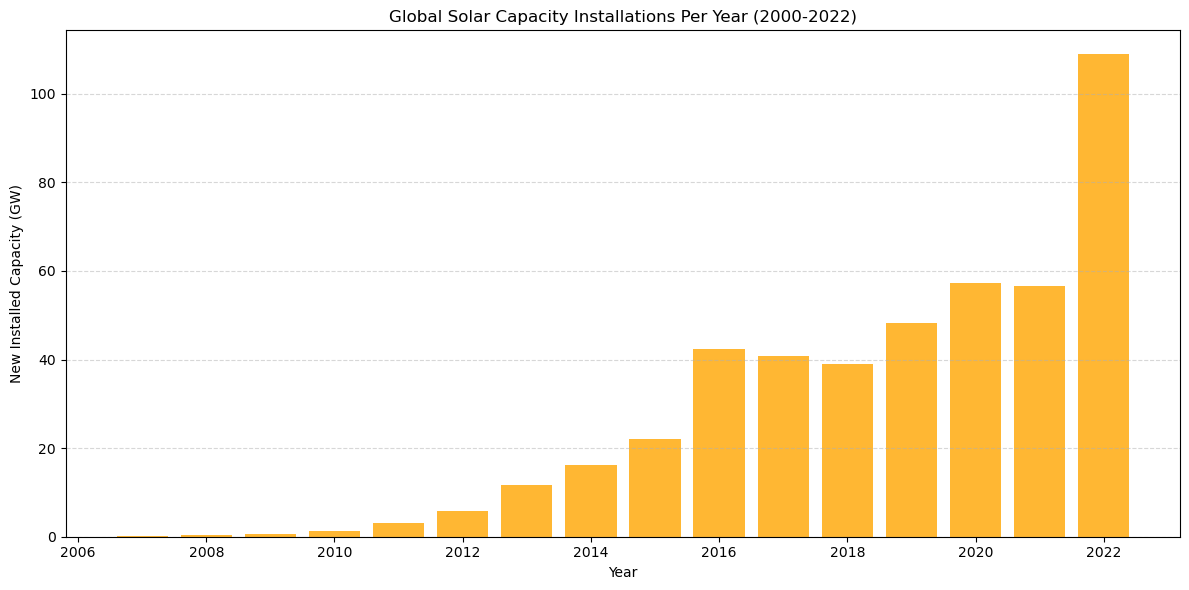

In [29]:
yearly_installations = df.groupby("Start year")["Capacity (MW)"].sum() / 1000  
yearly_installations = yearly_installations.loc[2000:2022]
plt.figure(figsize=(12, 6))
plt.bar(yearly_installations.index, yearly_installations, color="orange", alpha=0.8)
plt.xlabel("Year")
plt.ylabel("New Installed Capacity (GW)")
plt.title("Global Solar Capacity Installations Per Year (2000-2022)")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


Filter Relevant Years:
The dataset likely contains various years, but we group by year and sum up new installed capacity.
Since capacity is in MW, we divide by 1000 to convert to GW.
Bar Plot:
A bar chart represents each year's new capacity installations in GW.
Orange bars with transparency (alpha=0.8) make the visualization clear.
Grid lines improve readability.

## d)
The oldest solar PV parks are identified by finding the minimum start year among PV projects. Filtering the dataset for this year and technology type yields a list of pioneering solar parks, along with their locations, status, and capacities. This provides historical context for the evolution of solar power.

In [30]:
oldest_year = df[df["Technology Type"] == "PV"]["Start year"].min()
oldest_solar_parks = df[(df["Technology Type"] == "PV") & (df["Start year"] == oldest_year)]
oldest_solar_parks = oldest_solar_parks[["Project Name", "Country", "Start year", "Status", "Capacity (MW)"]]
print(f"Oldest solar photovoltaics park(s) started in {oldest_year}:")
oldest_solar_parks

Oldest solar photovoltaics park(s) started in 2007.0:


,Project Name,Country,Start year,Status,Capacity (MW)
14381,Hoya De Los Vicentes solar farm,Spain,2007.0,operating,23.0
14432,La Magascona solar farm,Spain,2007.0,operating,23.0
14504,Luzentia solar farm,Spain,2007.0,operating,23.0
14734,Serrezuela solar farm,Spain,2007.0,operating,32.5


## e)
The three largest operating solar parks are determined by filtering for projects with "operating" status and selecting the top three by capacity. Key details such as project name, country, capacity, start year, and technology type are presented, showcasing the scale and geographic distribution of major solar installations.

In [31]:
operating_solar_parks = df[df["Status"] == "operating"]

largest_solar_parks = operating_solar_parks.nlargest(3, "Capacity (MW)")

largest_solar_parks = largest_solar_parks[
    ["Project Name", "Country", "Capacity (MW)", "Start year", "State/Province", "Technology Type"]
]

print("Three Largest Operating Solar Parks in the World:")
largest_solar_parks

Three Largest Operating Solar Parks in the World:


,Project Name,Country,Capacity (MW),Start year,State/Province,Technology Type
9749,Ningxia Lingwu - Hunan Power Export State Ener...,China,2000.0,2023.0,Ningxia,PV
5631,Noor Abu Dhabi solar farm,United Arab Emirates,1177.0,2019.0,Abu Dhabi Emirate,PV
10028,Qinghai Hainan Talatan 1 solar farm,China,1000.0,2020.0,Qinghai,PV


## F)
Total installed capacity is aggregated by project status (e.g., operating, under construction, planned), and results are presented in gigawatts. This breakdown illustrates the current state of the global solar pipeline and the balance between existing and future projects.

In [32]:
capacity_by_status = df.groupby("Status")["Capacity (MW)"].sum() / 1000
print("Total Capacity (GW) per Project Status:")
capacity_by_status

Total Capacity (GW) per Project Status:


Status
announced           308.8301
cancelled            52.7744
construction        212.2908
mothballed            0.1420
operating           433.9444
pre-construction    663.1754
retired               0.3740
shelved              21.1049
Name: Capacity (MW), dtype: float64

## G)
Geospatial visualization is performed using `cartopy` to map the locations of operating and under-construction solar parks. Marker size reflects capacity, and color indicates start year. These maps reveal geographic clusters, regional trends, and the global spread of solar development over time.

Operating parks count: 6608
Construction parks count: 1809


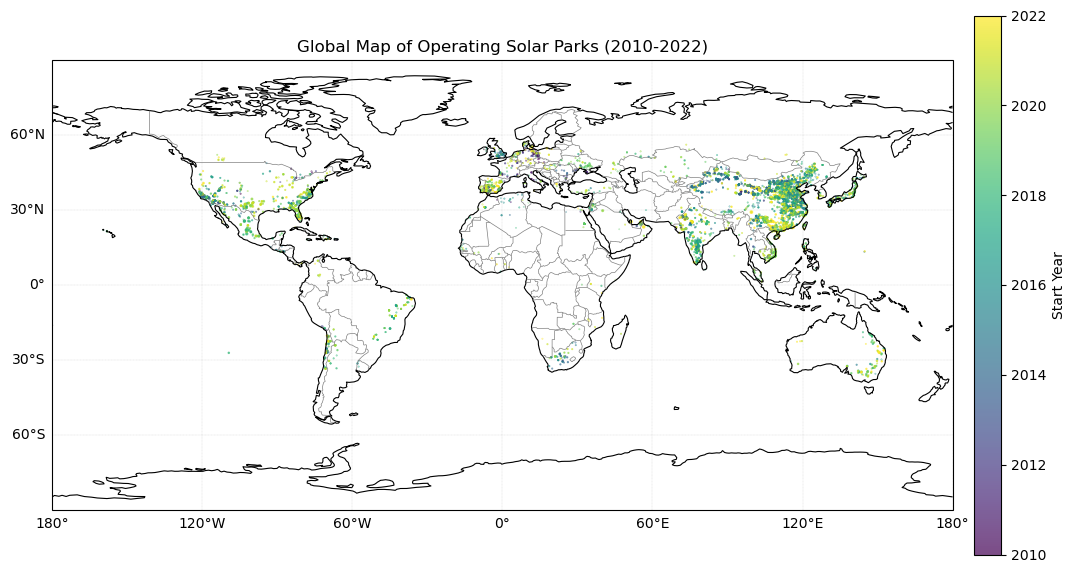

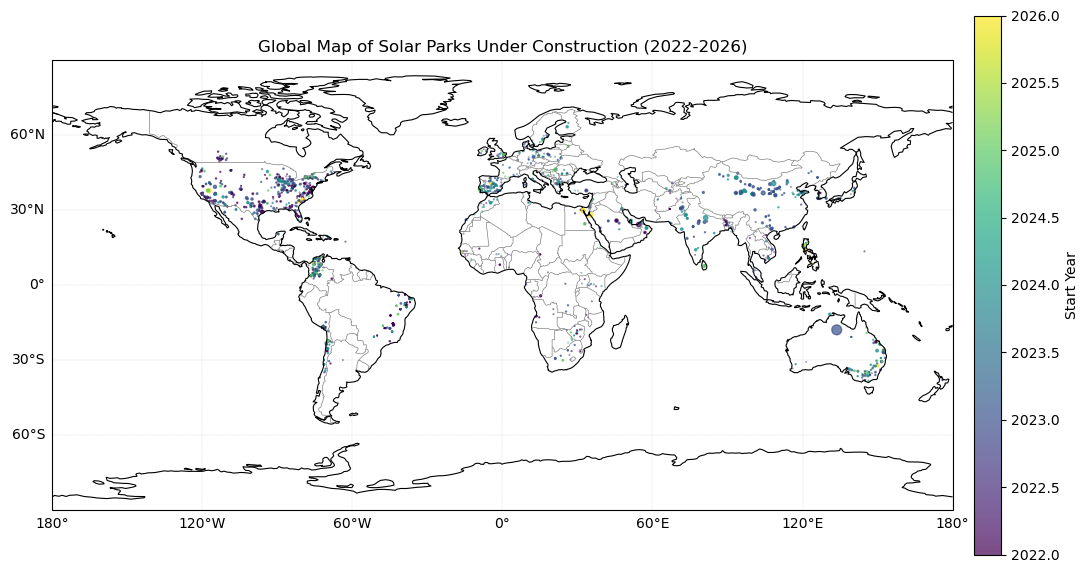

In [33]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

df = df.dropna(subset=["Latitude", "Longitude"])
df["Status"] = df["Status"].str.strip().str.lower()

operating_parks = df[(df["Status"] == "operating") & (df["Start year"].between(2010, 2022))]
construction_parks = df[df["Status"].str.contains("construction") & df["Start year"].between(2022, 2026)]

print("Operating parks count:", len(operating_parks))
print("Construction parks count:", len(construction_parks))
def plot_solar_parks(data, title, colorbar_range, save_as):
    fig, ax = plt.subplots(figsize=(14, 7), subplot_kw={'projection': ccrs.PlateCarree()})
    ax.set_global()
    ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())

    ax.add_feature(cfeature.COASTLINE, linewidth=0.8)
    ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor="gray")

    gl = ax.gridlines(draw_labels=True, linewidth=0.2, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False

    scatter = ax.scatter(
        data["Longitude"], data["Latitude"], 
        s=data["Capacity (MW)"] / 200,  
        c=data["Start year"], cmap="viridis", 
        edgecolors="face", alpha=0.7, transform=ccrs.PlateCarree()
    )

    cbar = plt.colorbar(scatter, ax=ax, orientation="vertical", pad=0.02)
    cbar.set_label("Start Year")
    scatter.set_clim(colorbar_range)

    plt.title(title)
    plt.savefig(save_as, dpi=300)
    plt.show()

plot_solar_parks(
    operating_parks, 
    "Global Map of Operating Solar Parks (2010-2022)", 
    (2010, 2022), 
    "operating_solar_parks.png"
)

plot_solar_parks(
    construction_parks, 
    "Global Map of Solar Parks Under Construction (2022-2026)", 
    (2022, 2026), 
    "construction_solar_parks.png"
)

## h)
The capacity-weighted mean age of operating solar parks is calculated by weighting each park's age (current year minus start year) by its capacity. This metric provides a more representative measure of fleet age than a simple average, as larger parks have a greater impact on overall performance and maintenance needs.

In [34]:
df_cleaned = df.dropna(subset=["Start year"])
operating_parks = df_cleaned[df_cleaned["Status"] == "operating"]

operating_parks = operating_parks.dropna(subset=["Capacity (MW)"])
operating_parks = operating_parks[operating_parks["Capacity (MW)"] > 0]

if operating_parks.empty:
    print("No valid operating solar parks found after filtering.")
else:
    # Compute current year
    current_year = 2025  # Update if needed

    # Compute capacity-weighted mean age
    ages = current_year - operating_parks["Start year"]
    capacity_weights = operating_parks["Capacity (MW)"]

    capacity_weighted_mean_age = np.average(ages, weights=capacity_weights)
    print(f"Capacity-Weighted Mean Age of Operating Solar Parks: {capacity_weighted_mean_age:.2f} years")


Capacity-Weighted Mean Age of Operating Solar Parks: 6.47 years


## i)
The capacity-weighted mean age is further broken down by continent (or region), allowing for comparison of solar fleet maturity across different parts of the world. The oldest and newest fleets are identified, highlighting regions with early adoption or recent rapid growth in solar power.

In [35]:
df_cleaned = df.dropna(subset=["Start year"])
current_year = 2025  
df_cleaned = df.dropna(subset=["Start year"]).copy()  
df_cleaned["Age"] = current_year - df_cleaned["Start year"] 

continent_avg_age = {}

for continent, group in df_cleaned.groupby("Region"):  
    if not group["Capacity (MW)"].sum() == 0:  
        weighted_age = np.average(group["Age"], weights=group["Capacity (MW)"])
        continent_avg_age[continent] = weighted_age

continent_avg_age_df = pd.DataFrame(list(continent_avg_age.items()), columns=["Continent", "Weighted Mean Age"])
continent_avg_age_df = continent_avg_age_df.sort_values(by="Weighted Mean Age", ascending=False)
oldest_fleet = continent_avg_age_df.iloc[0]
newest_fleet = continent_avg_age_df.iloc[-1]
# Display results
print("Capacity-Weighted Mean Age of Solar Parks by Continent:")
print(continent_avg_age_df)
print(f"\nOldest fleet: {oldest_fleet['Continent']} ({oldest_fleet['Weighted Mean Age']:.2f} years)")
print(f"Newest fleet: {newest_fleet['Continent']} ({newest_fleet['Weighted Mean Age']:.2f} years)")


Capacity-Weighted Mean Age of Solar Parks by Continent:
  Continent  Weighted Mean Age
2      Asia           4.314634
1  Americas           3.404049
3    Europe           3.285451
4   Oceania           2.140182
0    Africa           0.742029

Oldest fleet: Asia (4.31 years)
Newest fleet: Africa (0.74 years)


## Task 4

## a)
The industrial emissions dataset is loaded from a CSV file, with the appropriate separator and index column specified. Inspecting the first few rows and using `.info()` provides an overview of the data structure, column types, and completeness, which is essential for planning subsequent analysis steps.


In [36]:

file_path = "Industrial_Database.csv"  
df = pd.read_csv(file_path, sep=";", index_col=0)
df.head()

,SiteID,CompanyName,SiteName,Address,CityCode,City,Country,geom,Subsector,DataSource,Emissions_ETS_2014,Emissions_EPRTR_2014,Production,Fuel_Demand,Excess_Heat_100-200C,Excess_Heat_200-500C,Excess_Heat_500C,Excess_Heat_Total
0,1,voestalpine AG,voestalpine Stahl Donawitz GesmbH,Kerpelystrasse 199,8700,Leoben,Austria,POINT(15.067806 47.03378),Iron and steel,ETS/EPRTR,2808536.0,2810000.0,2726675.56,6346.15,192.34,173.66,0.00,366.01
1,2,voestalpine AG,voestalpine Stahl GmbH,voestalpine-Strasse 3,4020,Linz,Austria,POINT(14.343056 48.281944),Iron and steel,ETS/EPRTR,8698426.0,8660000.0,8444892.86,19732.48,595.71,330.48,40.16,966.36
2,3,Schmid Industrieholding,Wopfinger Baustoffindustrie,Wopfing 156,2754,Waldegg,Austria,POINT(16.085917 47.87225),Cement,ETS/EPRTR,364798.0,408000.0,477398.78,464.13,0.00,69.62,0.00,69.62
3,4,OMV Refining and Marketing GmbH,OMV Refining and Marketing GmbH,Mannswörther Strasse 28,2320,Schwechat,Austria,POINT(16.493889 48.144722),Refineries,ETS/EPRTR,2713186.0,2710000.0,NaN,NaN,0.00,0.00,0.00,0.00
4,5,Zementwerk Hatschek GmbH,Zementwerk Hatschek GmbH,Hatschekstrasse 25,4810,Gmunden,Austria,POINT(13.778 47.92278),Cement,ETS/EPRTR,331127.0,348000.0,607683.04,590.80,0.00,88.62,0.00,88.62


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5029 entries, 0 to 5028
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SiteID                5029 non-null   int64  
 1   CompanyName           4879 non-null   object 
 2   SiteName              5029 non-null   object 
 3   Address               4910 non-null   object 
 4   CityCode              4762 non-null   object 
 5   City                  4911 non-null   object 
 6   Country               5029 non-null   object 
 7   geom                  4514 non-null   object 
 8   Subsector             5029 non-null   object 
 9   DataSource            5029 non-null   object 
 10  Emissions_ETS_2014    3658 non-null   float64
 11  Emissions_EPRTR_2014  937 non-null    float64
 12  Production            1360 non-null   float64
 13  Fuel_Demand           1112 non-null   float64
 14  Excess_Heat_100-200C  5029 non-null   float64
 15  Excess_Heat_200-500C  5029

## b)
Geospatial processing involves converting the "geom" column from Well-Known Text (WKT) format into geometric objects using `shapely` and creating a GeoDataFrame with `geopandas`. Setting the correct CRS ensures accurate mapping. Rows with missing geometry are dropped to maintain data integrity. The index is set to "SiteID" for unique identification of industrial sites.

In [38]:
from shapely import wkt

file_path = "Industrial_Database.csv"
df = pd.read_csv(file_path, sep=";", index_col=0)
df = df.dropna(subset=["geom"])  
df["geom"] = df["geom"].astype(str)

df["geometry"] = df["geom"].apply(wkt.loads)
gdf = gpd.GeoDataFrame(df, geometry="geometry", crs="EPSG:4326")
gdf.set_index("SiteID", inplace=True)
gdf.head()

,CompanyName,SiteName,Address,CityCode,City,Country,geom,Subsector,DataSource,Emissions_ETS_2014,Emissions_EPRTR_2014,Production,Fuel_Demand,Excess_Heat_100-200C,Excess_Heat_200-500C,Excess_Heat_500C,Excess_Heat_Total,geometry
SiteID,,,,,,,,,,,,,,,,,,
1,voestalpine AG,voestalpine Stahl Donawitz GesmbH,Kerpelystrasse 199,8700,Leoben,Austria,POINT(15.067806 47.03378),Iron and steel,ETS/EPRTR,2808536.0,2810000.0,2726675.56,6346.15,192.34,173.66,0.00,366.01,POINT (15.06781 47.03378)
2,voestalpine AG,voestalpine Stahl GmbH,voestalpine-Strasse 3,4020,Linz,Austria,POINT(14.343056 48.281944),Iron and steel,ETS/EPRTR,8698426.0,8660000.0,8444892.86,19732.48,595.71,330.48,40.16,966.36,POINT (14.34306 48.28194)
3,Schmid Industrieholding,Wopfinger Baustoffindustrie,Wopfing 156,2754,Waldegg,Austria,POINT(16.085917 47.87225),Cement,ETS/EPRTR,364798.0,408000.0,477398.78,464.13,0.00,69.62,0.00,69.62,POINT (16.08592 47.87225)
4,OMV Refining and Marketing GmbH,OMV Refining and Marketing GmbH,Mannswörther Strasse 28,2320,Schwechat,Austria,POINT(16.493889 48.144722),Refineries,ETS/EPRTR,2713186.0,2710000.0,NaN,NaN,0.00,0.00,0.00,0.00,POINT (16.49389 48.14472)
5,Zementwerk Hatschek GmbH,Zementwerk Hatschek GmbH,Hatschekstrasse 25,4810,Gmunden,Austria,POINT(13.778 47.92278),Cement,ETS/EPRTR,331127.0,348000.0,607683.04,590.80,0.00,88.62,0.00,88.62,POINT (13.778 47.92278)


## c)
The number of industrial sites with missing location data is counted by checking for null values in the geometry column. This quantifies the extent of missing geospatial information, which may affect the completeness of spatial analyses and visualizations.

In [39]:
missing_locations = gdf["geometry"].isna().sum()

print(f"Number of industrial sites missing location data: {missing_locations}")

Number of industrial sites missing location data: 0


## d)
Missing values in ETS emissions are filled with corresponding values from the EPRTR emissions column, reducing data gaps. The number of missing values before and after filling is compared to assess the effectiveness of this imputation. This step ensures a more comprehensive emissions dataset for analysis.

In [40]:
df["Emissions"] = df["Emissions_ETS_2014"].fillna(df["Emissions_EPRTR_2014"])
remaining_missing = df["Emissions"].isna().sum()
before_filling = df["Emissions_ETS_2014"].isna().sum()
print(f"\nBefore filling: {before_filling} sites had missing ETS emissions.")
print(f"After filling: {remaining_missing} sites still have missing emissions.")
print("\nMain difference: Missing ETS values have been replaced with EPRTR emissions where available, reducing gaps in the dataset.")



Before filling: 1236 sites had missing ETS emissions.
After filling: 960 sites still have missing emissions.

Main difference: Missing ETS values have been replaced with EPRTR emissions where available, reducing gaps in the dataset.


## e)
A map of industrial sites in Europe is created using `cartopy` and `geopandas`. Sites are colored by industry sector and sized according to emissions, providing a visual overview of the spatial distribution and sectoral composition of industrial emissions. Basemap features such as coastlines, borders, and land/water are added for context.

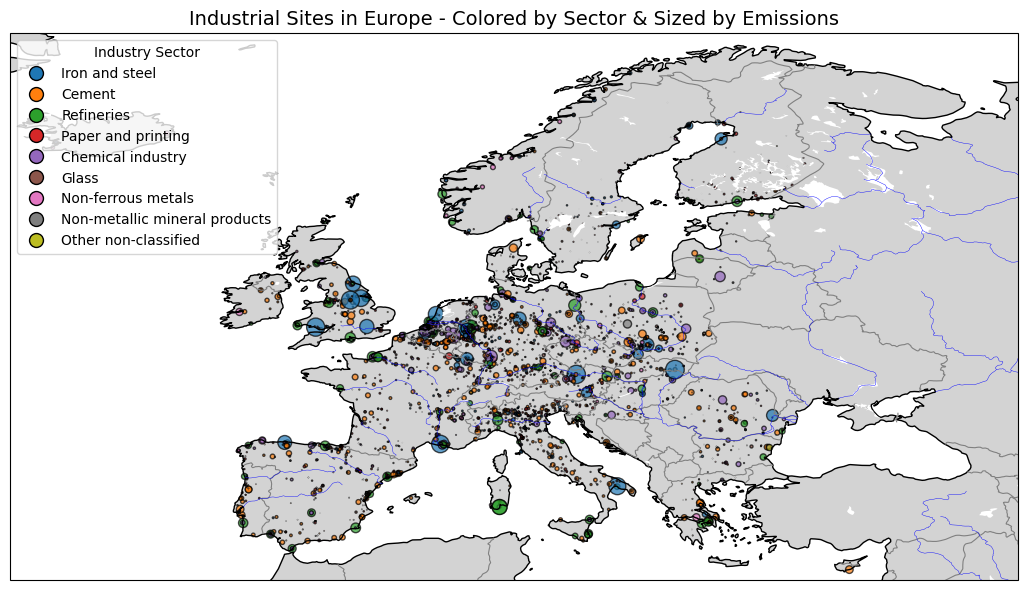

In [41]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

gdf = gdf.to_crs(epsg=4326)  
fig, ax = plt.subplots(figsize=(13, 13), subplot_kw={"projection": ccrs.PlateCarree()})
ax.set_extent([-25, 45, 34, 72], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.COASTLINE, edgecolor="black", linewidth=1)
ax.add_feature(cfeature.BORDERS, edgecolor="gray", linewidth=0.8)
ax.add_feature(cfeature.LAND, facecolor="lightgray")
ax.add_feature(cfeature.OCEAN, facecolor="white")
ax.add_feature(cfeature.LAKES, facecolor="white")
ax.add_feature(cfeature.RIVERS, edgecolor="blue", linewidth=0.3)

industries = df["Subsector"].unique()
colors = plt.cm.tab10.colors
color_dict = {industry: colors[i % len(colors)] for i, industry in enumerate(industries)}

# plot
sc = ax.scatter(
    gdf.geometry.x, gdf.geometry.y,
    s=df["Emissions"] / 50000,
    c=df["Subsector"].map(color_dict),
    edgecolors="black", alpha=0.7,
    transform=ccrs.PlateCarree()  
)


handles = [plt.Line2D([0], [0], marker='o', color='w',
                      markerfacecolor=color_dict[ind], markeredgecolor='black',
                      markersize=10) for ind in industries]
ax.legend(handles, industries, title="Industry Sector", loc="upper left", fontsize=10, frameon=True)
plt.title("Industrial Sites in Europe - Colored by Sector & Sized by Emissions", fontsize=14)
plt.show()

## f)
Total emissions are aggregated by industry sector and presented in a sorted bar chart. This visualization highlights the relative contributions of different sectors to overall industrial emissions, identifying major sources and potential targets for mitigation efforts.


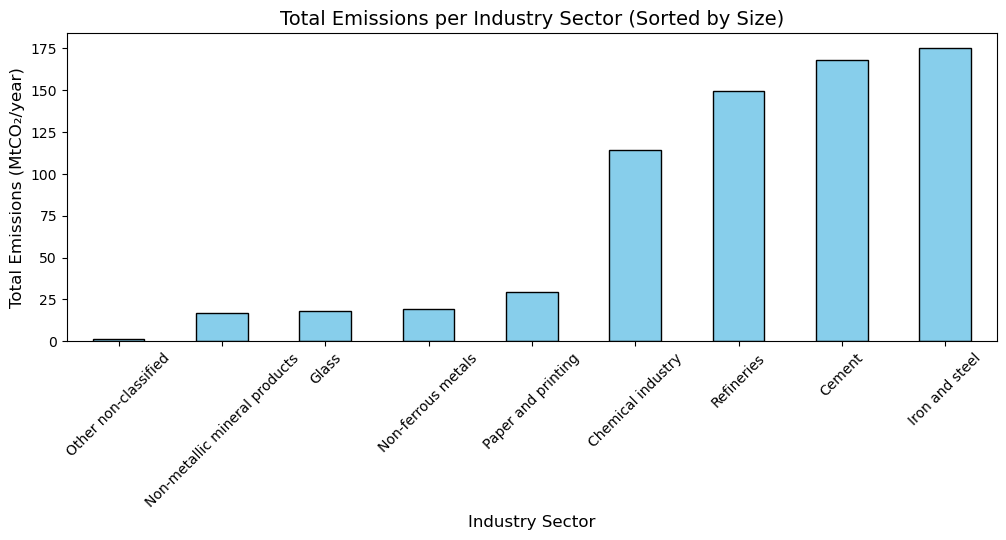

In [42]:
sector_emissions = df.groupby("Subsector")["Emissions"].sum() / 1e6 
sector_emissions = sector_emissions.sort_values()

fig, ax = plt.subplots(figsize=(12, 4))
sector_emissions.plot(kind="bar", ax=ax, color="skyblue", edgecolor="black")
ax.set_xlabel("Industry Sector", fontsize=12)
ax.set_ylabel("Total Emissions (MtCO₂/year)", fontsize=12)
ax.set_title("Total Emissions per Industry Sector (Sorted by Size)", fontsize=14)
ax.tick_params(axis="x", rotation=45)  

plt.show()


## g)
The two industry sectors with the highest total emissions are identified, and their percentage shares of the total are calculated. This analysis pinpoints the most significant contributors to industrial emissions, informing policy and strategic decisions.

In [43]:
sector_emissions = df.groupby("Subsector")["Emissions"].sum()
sector_emissions_sorted = sector_emissions.sort_values(ascending=False)
top_two_sectors = sector_emissions_sorted.head(2)
total_emissions = sector_emissions_sorted.sum()
sector_percentages = (top_two_sectors / total_emissions) * 100
print(f"Top two industry sectors with highest emissions:\n{top_two_sectors}")
print("\nPercentage share relative to total emissions:")

sector_percentages.round(2)

Top two industry sectors with highest emissions:
Subsector
Iron and steel    175353543.0
Cement            168064285.0
Name: Emissions, dtype: float64

Percentage share relative to total emissions:


Subsector
Iron and steel    25.33
Cement            24.28
Name: Emissions, dtype: float64

## h)
For the chemical industry sector, emissions are grouped by country using the EPRTR data. The top two countries with the highest emissions are identified, providing insight into the geographic distribution of emissions within this sector.

In [44]:
chemical_industry_df = df[df["Subsector"] == "Chemical industry"]
country_eprtr_emissions = chemical_industry_df.groupby("Country")["Emissions_EPRTR_2014"].sum()
top_two_countries_eprtr = country_eprtr_emissions.sort_values(ascending=False).head(2)

print("Top two countries with highest EPRTR emissions in the chemical industry sector:")
print(top_two_countries_eprtr)

Top two countries with highest EPRTR emissions in the chemical industry sector:
Country
Germany        27660658.0
Netherlands    18818835.8
Name: Emissions_EPRTR_2014, dtype: float64


## I)
Emissions are grouped by country and sector to identify, for each country, the sector with the highest emissions. The results are presented in a table, showing the dominant industrial emission source in each country and the corresponding total emissions.

In [45]:
country_sector_emissions = df.groupby(["Country", "Subsector"])["Emissions"].sum()
highest_sector_per_country = country_sector_emissions.groupby(level=0).idxmax()
highest_sector_emissions = country_sector_emissions.loc[highest_sector_per_country]

result_df = pd.DataFrame({
    "Country": highest_sector_per_country.index,
    "Highest Emission Sector": highest_sector_per_country.values,
    "Total Emissions (MtCO₂/year)": (highest_sector_emissions / 1e6).round(2)  # Convert to MtCO₂
})

result_df

,,Country,Highest Emission Sector,Total Emissions (MtCO₂/year)
Country,Subsector,,,
Austria,Iron and steel,Austria,"(Austria, Iron and steel)",11.89
Belgium,Cement,Belgium,"(Belgium, Cement)",13.61
Bulgaria,Cement,Bulgaria,"(Bulgaria, Cement)",1.74
Cyprus,Cement,Cyprus,"(Cyprus, Cement)",1.51
Czech Republic,Chemical industry,Czech Republic,"(Czech Republic, Chemical industry)",5.17
Denmark,Cement,Denmark,"(Denmark, Cement)",1.72
Estonia,Cement,Estonia,"(Estonia, Cement)",0.86
Finland,Iron and steel,Finland,"(Finland, Iron and steel)",4.53
France,Chemical industry,France,"(France, Chemical industry)",15.36


## j)
The top 10 Polish companies by emissions are listed, along with their subsector and emissions (converted to MtCO₂/year). This ranking highlights the largest emitters in Poland's industrial sector, which may be of interest for regulatory or mitigation efforts.

In [46]:
polish_companies_df = df[df["Country"] == "Poland"]

top_10_polish_companies = (
    polish_companies_df[["CompanyName", "Subsector", "Emissions"]]
    .sort_values(by="Emissions", ascending=False)
    .head(10)
)

top_10_polish_companies["Emissions (MtCO₂/year)"] = (top_10_polish_companies["Emissions"] / 1e6).round(2)

(top_10_polish_companies[["CompanyName", "Subsector", "Emissions (MtCO₂/year)"]])

,CompanyName,Subsector,Emissions (MtCO₂/year)
773,NaN,Iron and steel,4.41
767,NaN,Refineries,2.28
802,NaN,Chemical industry,2.20
785,NaN,Cement,2.06
1115,CRH,Cement,1.84
4384,Grupa Ożarów S.A.,Non-metallic mineral products,1.72
766,NaN,Refineries,1.52
786,NaN,Cement,1.50
769,Arcelor Mittal Poland,Iron and steel,1.20
777,LAFARGE CEMENT S.A.,Cement,1.08


## k)
A choropleth map of industry emissions density (emissions per area) is created for NUTS-2 regions in Europe. Emissions are aggregated by region, and area is calculated using a projected CRS for accuracy. The map uses a high-contrast colormap to visualize spatial patterns in emissions intensity, focusing on continental Europe.

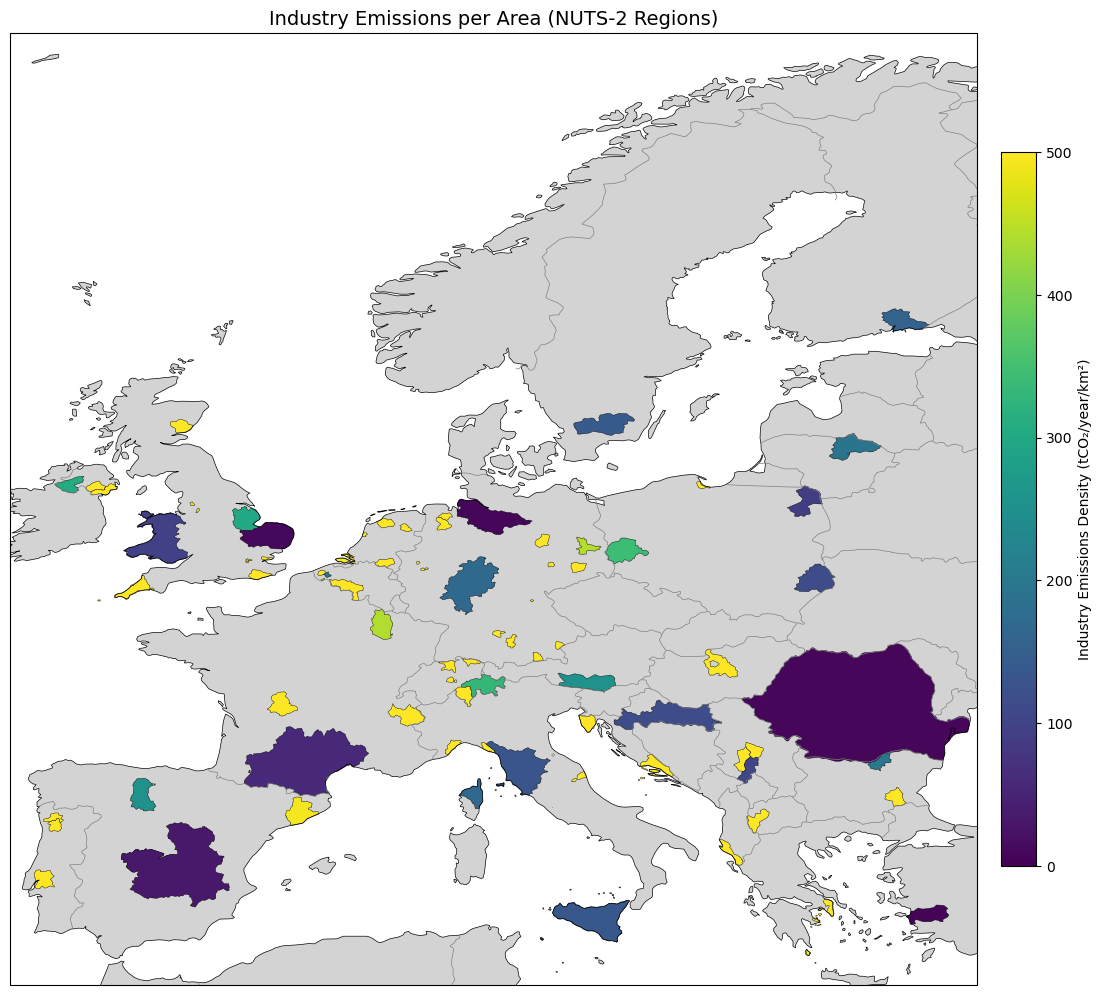

In [47]:
import matplotlib.colors as mcolors
from cartopy import crs as ccrs
from cartopy import feature as cfeature

# Step 1: Load NUTS-2 shapefile
nuts2_gdf = gpd.read_file("https://tubcloud.tu-berlin.de/s/5WJ6pGsBKR7a3sp/download/NUTS_RG_10M_2021_4326.geojson")

# Step 2: Standardize NUTS_ID
nuts2_gdf["NUTS_ID"] = nuts2_gdf["NUTS_ID"].str.strip().str.upper()

# Step 3: Simulate or load industry emissions data (replace this with your actual df)
import numpy as np
np.random.seed(42)
fake_codes = np.random.choice(nuts2_gdf["NUTS_ID"], size=100)
fake_emissions = np.random.randint(10_000, 5_000_000, size=100)
df = pd.DataFrame({"CityCode": fake_codes, "Emissions": fake_emissions})

# Clean and aggregate emissions
df["CityCode"] = df["CityCode"].str.strip().str.upper()
nuts2_emissions = df.groupby("CityCode")["Emissions"].sum()
nuts2_gdf["Emissions"] = nuts2_gdf["NUTS_ID"].map(nuts2_emissions).fillna(0)

# Calculate area if not available
nuts2_gdf = nuts2_gdf.to_crs(epsg=3035)  # Use a projected CRS for accurate area
nuts2_gdf["Area_km2"] = nuts2_gdf.geometry.area / 1e6

# Calculate emissions density
nuts2_gdf["Emissions_density"] = nuts2_gdf["Emissions"] / nuts2_gdf["Area_km2"]

#  Filter out regions with zero emissions density
filtered_gdf = nuts2_gdf[nuts2_gdf["Emissions_density"] > 0]

# Step 8: Plotting
fig, ax = plt.subplots(figsize=(12, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Add basemap features
ax.add_feature(cfeature.COASTLINE, edgecolor="black", linewidth=0.5)
ax.add_feature(cfeature.BORDERS, edgecolor="gray", linewidth=0.5)
ax.add_feature(cfeature.LAND, facecolor="lightgray")
ax.add_feature(cfeature.OCEAN, facecolor="white")

# Plot the data
norm = mcolors.Normalize(vmin=0, vmax=500)  
filtered_gdf.to_crs(epsg=4326).plot(
    column="Emissions_density",
    cmap="viridis",  
    edgecolor="black",
    linewidth=0.3,
    legend=False,
    norm=norm,
    ax=ax
)

ax.set_extent([-10, 30, 35, 72], crs=ccrs.PlateCarree())
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation="vertical", shrink=0.75, pad=0.02)
cbar.set_label("Industry Emissions Density (tCO₂/year/km²)")
ax.set_title("Industry Emissions per Area (NUTS-2 Regions)", fontsize=14)

plt.tight_layout()
plt.show()

## l)
For Austria, industrial emissions are aggregated at the NUTS-3 regional level. The region with the highest emissions is identified, and the companies and industry sectors present in this region are listed. This analysis provides a detailed view of regional emission hotspots and their industrial composition.

In [48]:
austrian_df = nuts2_gdf[nuts2_gdf["CNTR_CODE"] == "AT"] 
nuts3_emissions = austrian_df.groupby("CNTR_CODE")["Emissions"].sum()  
top_nuts3_region = nuts3_emissions.idxmax()  
max_emissions = nuts3_emissions.max()  
region_name = austrian_df.loc[austrian_df["CNTR_CODE"] == top_nuts3_region, "CNTR_CODE"].values[0]

top_region_companies = austrian_df[austrian_df["CNTR_CODE"] == top_nuts3_region][["NAME_LATN", "NUTS_NAME"]]
print(f"Highest Industry Emissions in Austria – NUTS-3 Region (CNTR_CODE: {top_nuts3_region})")
print(f"Region Name: {region_name}")
print(f"Total Emissions: {max_emissions / 1e6:.2f} MtCO₂/year\n")
print("Companies & Industry Sectors:")
top_region_companies

Highest Industry Emissions in Austria – NUTS-3 Region (CNTR_CODE: AT)
Region Name: AT
Total Emissions: 2.41 MtCO₂/year

Companies & Industry Sectors:


,NAME_LATN,NUTS_NAME
36,Mittelburgenland,Mittelburgenland
37,Nordburgenland,Nordburgenland
38,Südburgenland,Südburgenland
39,Mostviertel-Eisenwurzen,Mostviertel-Eisenwurzen
40,Niederösterreich-Süd,Niederösterreich-Süd
41,Sankt Pölten,Sankt Pölten
42,Waldviertel,Waldviertel
43,Weinviertel,Weinviertel
44,Wiener Umland/Nordteil,Wiener Umland/Nordteil
45,Wiener Umland/Südteil,Wiener Umland/Südteil
